In [2]:
import pandas as pd
import numpy as np

In [34]:
data = pd.read_csv('Data_Files/advertising.csv',
                  names=['TimeSpent', 'Age','AreaIncome','DailyInternetUsage',
                           'AdHeadline','City','Male','Country','Timestamp','Clicked'],
                  header=1)

In [4]:
data.sample(5)

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
468,65.65,25,63879.72,224.92,Intuitive explicit firmware,Sandraville,1,Cook Islands,6/3/2016 6:34,0
222,60.94,41,76893.84,154.97,Fundamental fault-tolerant neural-net,Garciaview,0,Latvia,2/14/2016 7:30,1
815,36.91,48,54645.20,159.69,Ameliorated coherent open architecture,North Samantha,0,Zimbabwe,2/24/2016 7:13,1
762,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,Jessicashire,1,Mali,6/5/2016 7:54,1
128,67.36,37,73104.47,233.56,Future-proofed grid-enabled implementation,North Wesleychester,0,Jersey,7/6/2016 16:00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           999 non-null    float64
 1   Age                 999 non-null    int64  
 2   AreaIncome          999 non-null    float64
 3   DailyInternetUsage  999 non-null    float64
 4   AdHeadline          999 non-null    object 
 5   City                999 non-null    object 
 6   Male                999 non-null    int64  
 7   Country             999 non-null    object 
 8   Timestamp           999 non-null    object 
 9   Clicked             999 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Clean the data

In [35]:
data[data.duplicated()==True]
#or data.duplicated().sum()

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked


In [36]:
#if dupes exist:
data.drop_duplicates(inplace=True)
data[data.duplicated()==True]

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked


In [37]:
data[data['TimeSpent']=='?']
#If this came up with records, then:
# data.replace('?',np.nan,inplace=True)

C:\Users\g_lee\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked


In [146]:
data.loc[609]

TimeSpent                                                    32.91
Age                                                             37
AreaIncome                                                 51691.6
DailyInternetUsage                                          181.02
AdHeadline            Future-proofed fresh-thinking conglomeration
City                                                 Elizabethstad
Male                                                             0
Country                                               South Africa
Timestamp                                          7/17/2016 14:26
Clicked                                                          1
Name: 609, dtype: object

In [ ]:
# converting fields to numeric
# data['TimeSpent'] = pd.to_numeric(data['TimeSpent'])
# data['Age'] = pd.to_numeric(data['Age'])

In [9]:
data.isnull().sum()

TimeSpent             0
Age                   0
AreaIncome            0
DailyInternetUsage    0
AdHeadline            0
City                  0
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

### No missing records shown above, but if there were:

In [ ]:
# data['Age'] = data['Age'].fillna(data['Age'].median())
# data.isnull().sum()

# data['TimeSpent'] = data['TimeSpent'].fillna(data['TimeSpent'].median())
# data.isnull().sum()

# data.dropna(inplace=True)

#### You can perform a combination of replaces and drops as seen above

# Analyze the data

In [10]:
numeric = ['TimeSpent','Age','AreaIncome','DailyInternetUsage']

In [11]:
data[numeric].describe()

,TimeSpent,Age,AreaIncome,DailyInternetUsage
count,999.000000,999.000000,999.000000,999.000000
mean,64.996246,36.010010,54993.159339,179.923934
std,15.861062,8.789905,13419.607906,43.858176
min,32.600000,19.000000,13996.500000,104.780000
25%,51.340000,29.000000,47012.585000,138.790000
50%,68.180000,35.000000,57009.760000,182.840000
75%,78.555000,42.000000,65479.350000,218.700000
max,91.430000,61.000000,79484.800000,269.960000


In [38]:
categorical = ['AdHeadline','City','Male','Country','Clicked']

In [39]:
data[categorical].describe(include=['O'])

,AdHeadline,City,Country
count,999,999,999
unique,999,969,237
top,Enhanced tertiary utilization,Williamsport,France
freq,1,3,9


### The AdHeadline and City columns do not have much "predictive" power

In [40]:
pd.crosstab(data['Country'],
            data['Clicked']).sort_values(1,0,ascending=False).head(15)

Clicked,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


### Crosstab sets up a matrix of country info to clicked columns. But due to the low number of records from the SAME country, this indicates that the Country column would not have a lot of predictive power either.

In [41]:
pd.crosstab(index = data['Country'],
           columns = 'count').sort_values(['count'],ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


### At the most, we have 9 unique records in a country

In [42]:
# If we needed to convert the Date/Timestamp column values

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [43]:
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

In [44]:
data['Weekday'] = data['Timestamp'].dt.dayofweek

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TimeSpent           999 non-null    float64       
 1   Age                 999 non-null    int64         
 2   AreaIncome          999 non-null    float64       
 3   DailyInternetUsage  999 non-null    float64       
 4   AdHeadline          999 non-null    object        
 5   City                999 non-null    object        
 6   Male                999 non-null    int64         
 7   Country             999 non-null    object        
 8   Timestamp           999 non-null    datetime64[ns]
 9   Clicked             999 non-null    int64         
 10  Month               999 non-null    int64         
 11  Day                 999 non-null    int64         
 12  Hour                999 non-null    int64         
 13  Weekday             999 non-null    int64         

In [46]:
data.sample(10)

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked,Month,Day,Hour,Weekday
857,37.65,51,50457.01,161.29,Automated stable help-desk,Davidview,1,Bahrain,2016-03-09 06:22:00,1,3,9,6,2
289,50.52,31,72270.88,171.62,Function-based stable alliance,Lake Allenville,0,New Caledonia,2016-01-23 15:02:00,1,1,23,15,5
181,62.95,60,36752.24,157.04,Polarized tangible collaboration,Youngfort,0,Peru,2016-05-24 13:30:00,1,5,24,13,1
757,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,West Ryan,0,Uganda,2016-01-01 15:14:00,1,1,1,15,4
948,78.96,50,69868.48,193.15,Stand-alone well-modulated product,East Jason,0,Cayman Islands,2016-02-12 01:55:00,1,2,12,1,4
604,64.67,51,24316.61,138.35,Horizontal incremental website,Andersonfurt,1,Togo,2016-02-14 16:33:00,1,2,14,16,6
60,85.84,34,64654.66,192.93,Front-line heuristic data-warehouse,Lake Annashire,1,Saint Vincent and the Grenadines,2016-06-15 05:30:00,0,6,15,5,2
571,72.80,35,63551.67,249.54,Public-key solution-oriented focus group,Austinland,0,Puerto Rico,2016-01-03 23:21:00,0,1,3,23,6
36,65.82,39,76435.30,221.94,Reactive demand-driven capacity,Kellytown,0,Ukraine,2016-02-09 05:28:00,0,2,9,5,1
560,38.35,41,34886.01,144.69,Synergistic reciprocal attitude,Loriville,1,Vanuatu,2016-06-24 08:42:00,1,6,24,8,4


In [47]:
import matplotlib.pyplot as plt

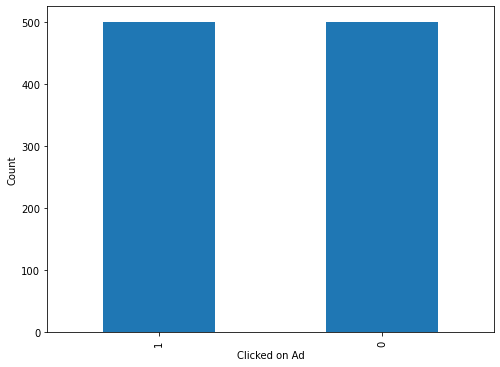

In [48]:
data['Clicked'].value_counts().plot(kind = 'bar', figsize=(8,6))

plt.xlabel('Clicked on Ad')
plt.ylabel('Count')

plt.show()

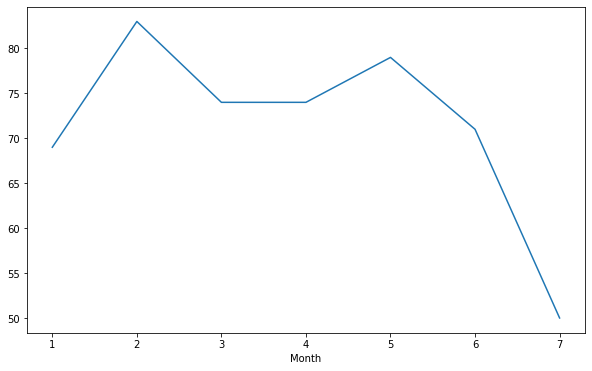

In [49]:
monthly_data = data.groupby(['Month'])['Clicked'].sum()
monthly_data.plot(figsize=(10,6))

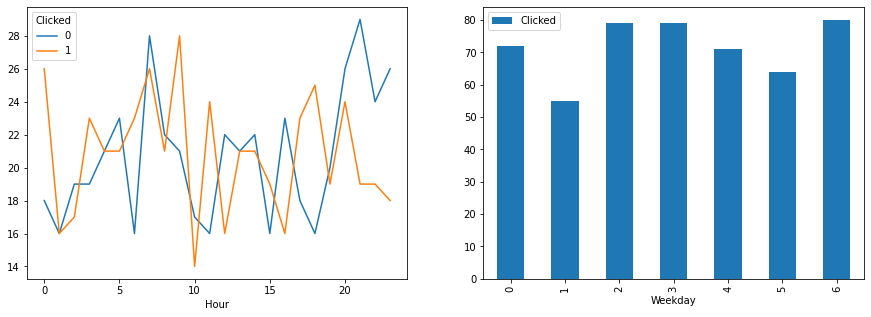

In [50]:
f, ax = plt.subplots(1,2,figsize = (15,5))

pd.crosstab(data['Clicked'], data['Hour']).T.plot(ax=ax[0])

pd.pivot_table(data, index=['Weekday'],
              values=['Clicked'],
              aggfunc=np.sum).plot(kind='bar', ax=ax[1])
plt.show()

In [51]:
data.groupby('Clicked')['TimeSpent','Age','AreaIncome','DailyInternetUsage'].mean()

<ipython-input-51-b1c1aeb91a7e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Clicked')['TimeSpent','Age','AreaIncome','DailyInternetUsage'].mean()


,TimeSpent,Age,AreaIncome,DailyInternetUsage
Clicked,,,,
0,76.870461,31.677355,61384.687996,214.430421
1,53.145780,40.334000,48614.413740,145.486460


### This tells us: a. People tend to stay longer on site w/o clicking ads, b. Older people clicked on ads more than younger, c. lower income clicked

In [52]:
import seaborn as sns

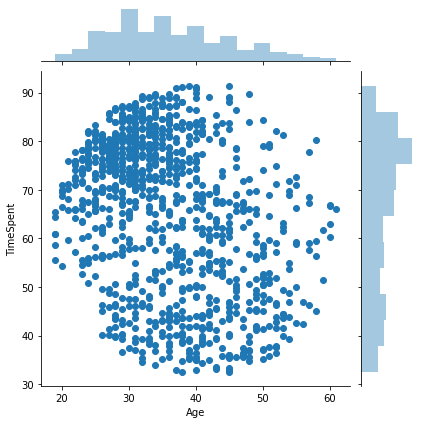

In [53]:
#A Jointplot is a scatterplot representation of the data along w/ univarate distributions
sns.jointplot(x='Age', y='TimeSpent',data=data)

### This shows no real relationship with Age and TimeSpent

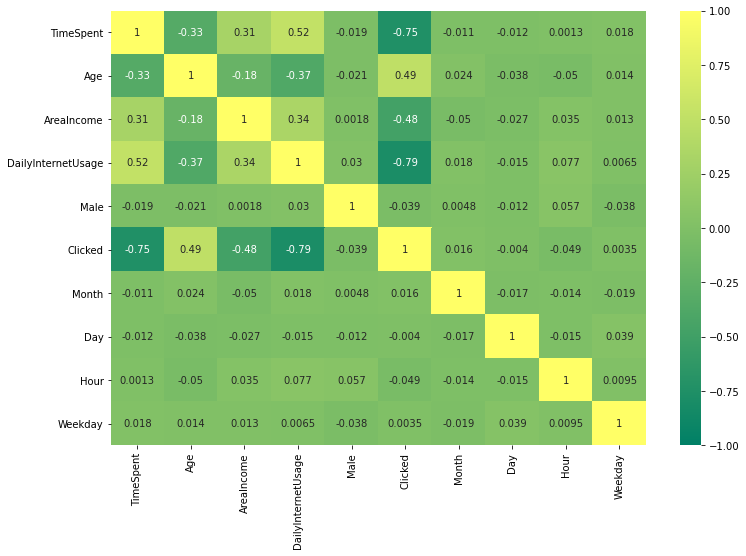

In [59]:
fig = plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),  #this will run a correlation for ALL data fields
           cmap = 'summer', #can customize with other seasonal colors: spring, winter, autumn
           annot = True, vmin = -1, vmax = 1)

In [63]:
#This connects/establishes Jupyter Lab (or Notebooks) to your plotly account
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go

chart_studio.tools.set_credentials_file(username='geneleebpt', api_key='QCkepE8DDTQpfAw2uxlL')

In [64]:
trace0 = go.Scatter(x=data['DailyInternetUsage'],
                   y = data['AreaIncome'],
                   mode = 'markers',
                   marker = dict(size = data['Age']/2,
                                color = data['Clicked'],
                                 colorscale = 'Rainbow',
                                 showscale = True),
                    text = data['Age'])
data0 = [trace0]
layout = go.Layout(xaxis = dict(title='Daily Internet Usage'),
                  yaxis = dict(title = 'Area Income'))

fig = go.Figure(data=data0, layout=layout)
py.iplot(fig,filename = 'scatter_plot',auto_open=True)

### When executing script above, this will bring up Plotly cloud on the web w/ the same visualization.